# Lab 4

Excercise 1

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
import pandas as pd
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Default model for comparison

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["accuracy"])

In [6]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, verbose=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history_1 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9246 - val_loss: 0.1191 - val_accuracy: 0.9658
Epoch 2/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0998 - accuracy: 0.9708 - val_loss: 0.0899 - val_accuracy: 0.9726
Epoch 3/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9788 - val_loss: 0.0653 - val_accuracy: 0.9780
Epoch 4/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0678 - val_accuracy: 0.9802
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0694 - val_accuracy: 0.9806
Epoch 6/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0620 - val_accuracy: 0.9830
Epoch 7/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0714 - val_accuracy:

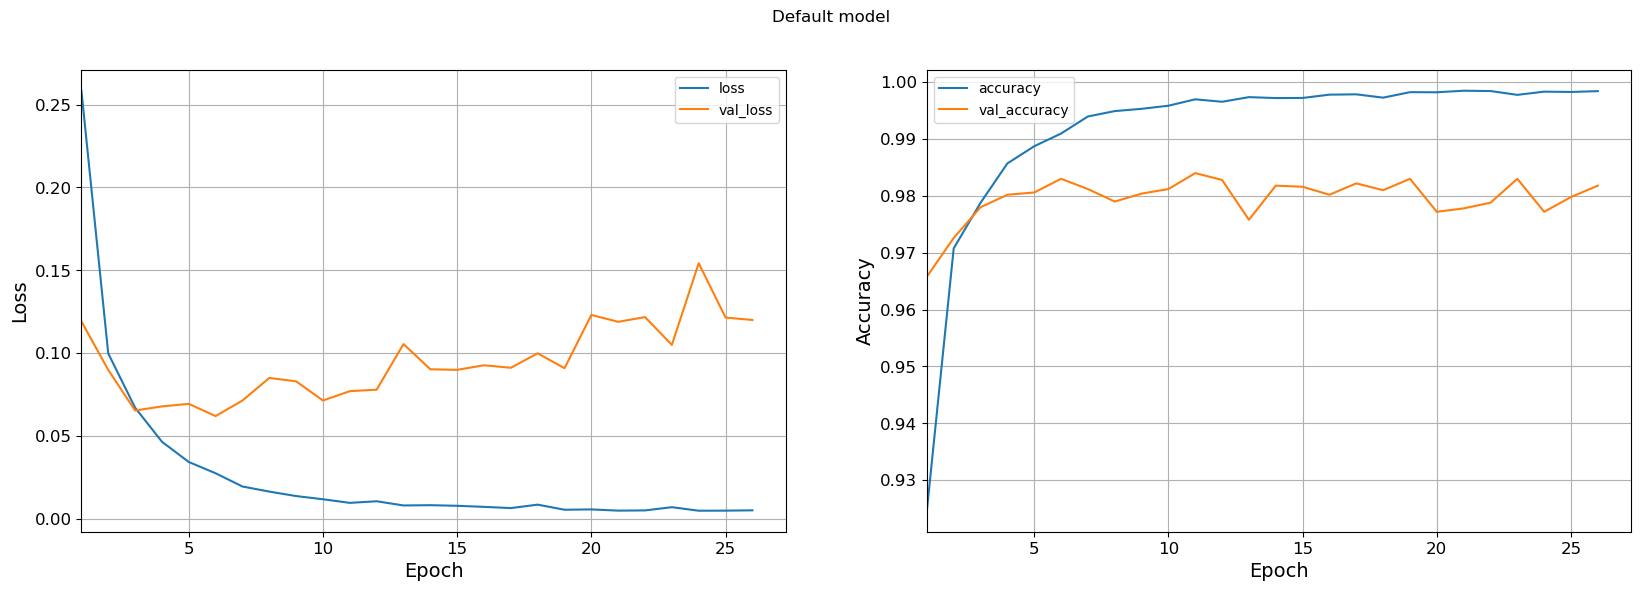

In [7]:
history_df_normal = pd.DataFrame(history_1.history)
history_df_normal.index += 1

cols1 = ['loss', 'val_loss']
cols2 = ['accuracy', 'val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 6)

ax1.plot(history_df_normal[cols1])
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_xlim(left=1)
ax1.legend(cols1)

ax2.plot(history_df_normal[cols2])
ax2.grid(True)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(left=1)
ax2.legend(cols2)

fig.suptitle('Default model')
plt.savefig("curves_normal.png", dpi=300)
plt.show()

In [8]:
# Load the model and evaluate it on the test set

model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 952us/step - loss: 0.0739 - accuracy: 0.9783


[0.07390159368515015, 0.9782999753952026]

# Avoiding Overfitting Through Regularization

# l1 regularization

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu",
                           kernel_regularizer=keras.regularizers.l1(0.0005)),
    keras.layers.Dense(100, activation="relu",
                           kernel_regularizer=keras.regularizers.l1(0.0005)),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["accuracy"])

In [11]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, verbose=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model_l1.h5", save_best_only=True)

history_1 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
1719/1719 [==============================] - 4s 2ms/step - loss: 1.4733 - accuracy: 0.8993 - val_loss: 0.7436 - val_accuracy: 0.9330
Epoch 2/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6097 - accuracy: 0.9324 - val_loss: 0.4890 - val_accuracy: 0.9486
Epoch 3/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4472 - accuracy: 0.9461 - val_loss: 0.3883 - val_accuracy: 0.9562
Epoch 4/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3849 - accuracy: 0.9518 - val_loss: 0.3579 - val_accuracy: 0.9610
Epoch 5/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3556 - accuracy: 0.9563 - val_loss: 0.3412 - val_accuracy: 0.9606
Epoch 6/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.9586 - val_loss: 0.3174 - val_accuracy: 0.9622
Epoch 7/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.9609 - val_loss: 0.3205 - val_accuracy:

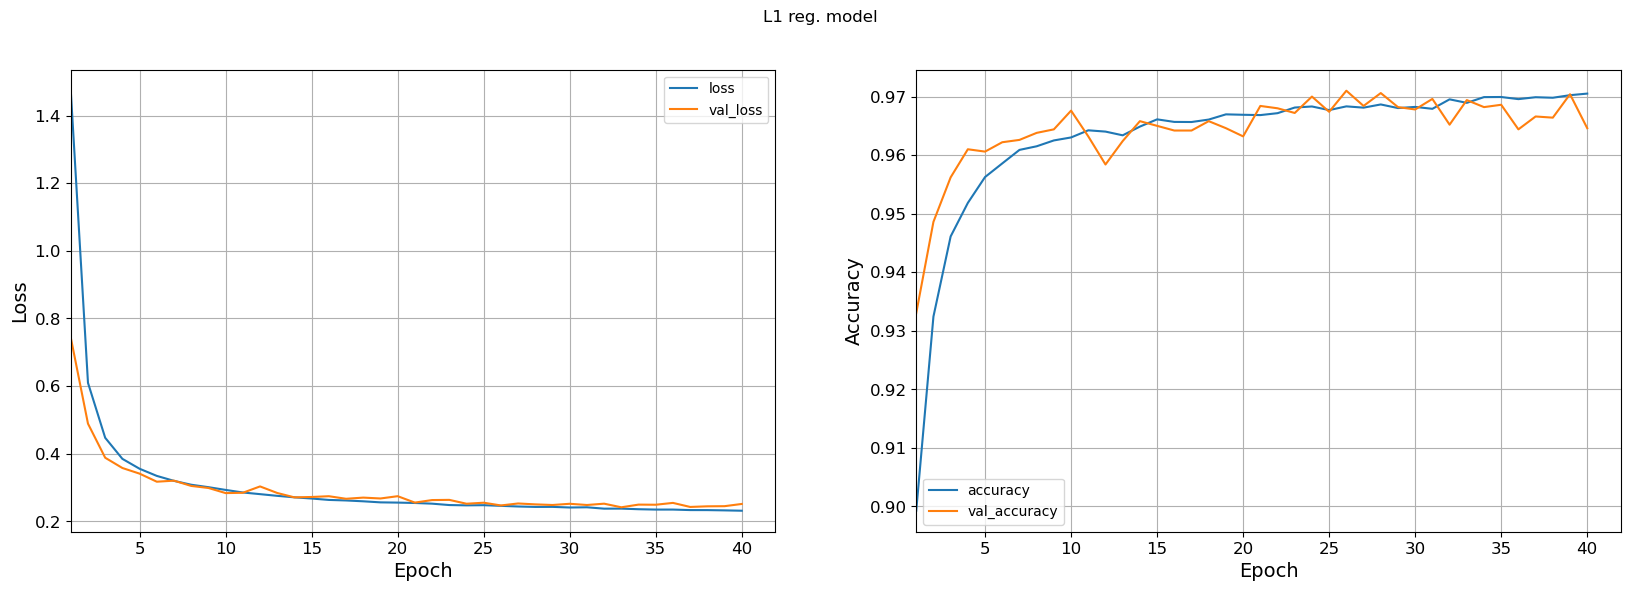

In [12]:
history_df_l1 = pd.DataFrame(history_1.history)
history_df_l1.index += 1

cols1 = ['loss', 'val_loss']
cols2 = ['accuracy', 'val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 6)

ax1.plot(history_df_l1[cols1])
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_xlim(left=1)
ax1.legend(cols1)

ax2.plot(history_df_l1[cols2])
ax2.grid(True)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(left=1)
ax2.legend(cols2)

fig.suptitle('L1 reg. model')
plt.savefig("curves_normal.png", dpi=300)
plt.show()

In [13]:
# Load the model and evaluate it on the test set

model = keras.models.load_model("my_mnist_model_l1.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.9687


[0.23880082368850708, 0.9686999917030334]

# l2 regularization

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu",
                           kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="relu",
                           kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["accuracy"])

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model_l2.h5", save_best_only=True)

history_1 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
1719/1719 [==============================] - 3s 2ms/step - loss: 1.1230 - accuracy: 0.8970 - val_loss: 0.5611 - val_accuracy: 0.9278
Epoch 2/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5262 - accuracy: 0.9226 - val_loss: 0.4674 - val_accuracy: 0.9372
Epoch 3/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4647 - accuracy: 0.9327 - val_loss: 0.4183 - val_accuracy: 0.9454
Epoch 4/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4207 - accuracy: 0.9404 - val_loss: 0.3915 - val_accuracy: 0.9500
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3875 - accuracy: 0.9458 - val_loss: 0.3571 - val_accuracy: 0.9542
Epoch 6/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3639 - accuracy: 0.9480 - val_loss: 0.3382 - val_accuracy: 0.9584
Epoch 7/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3422 - accuracy: 0.9523 - val_loss: 0.3178 - val_accuracy:

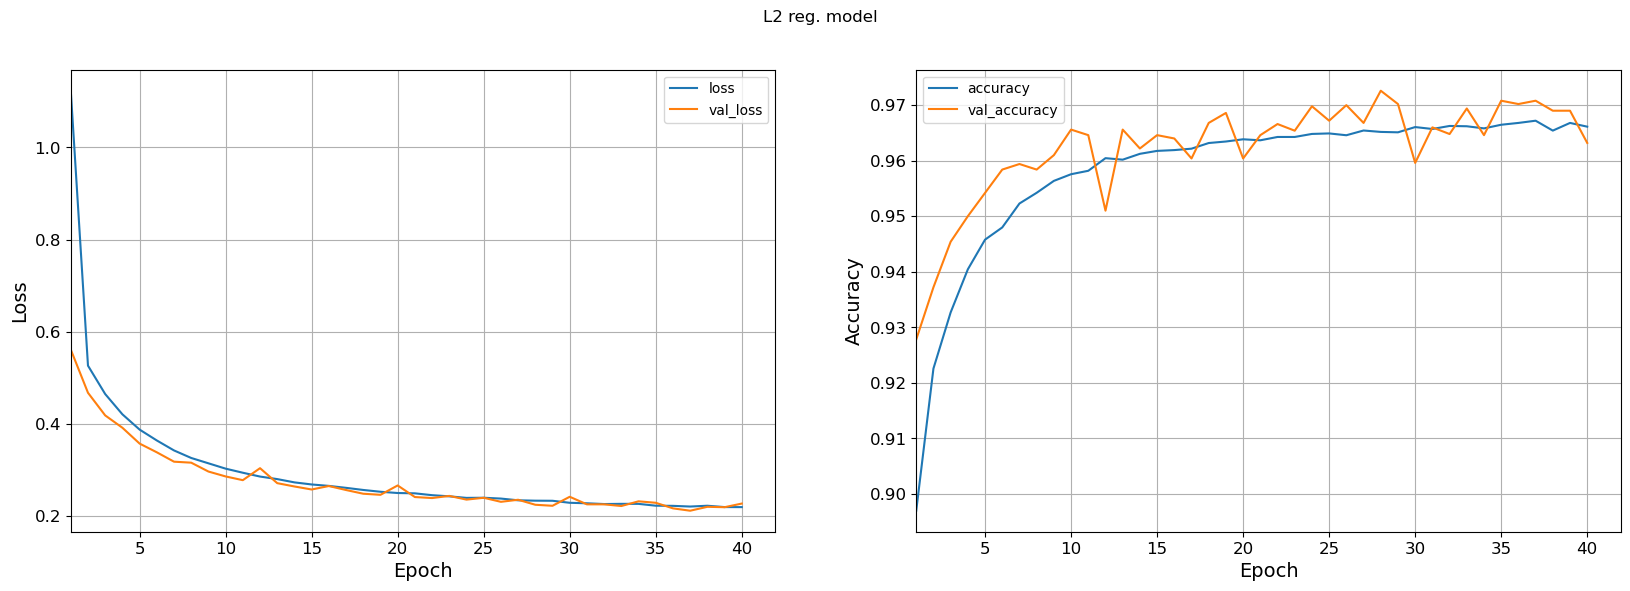

In [17]:
history_df_l2 = pd.DataFrame(history_1.history)
history_df_l2.index += 1

cols1 = ['loss', 'val_loss']
cols2 = ['accuracy', 'val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 6)

ax1.plot(history_df_l2[cols1])
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_xlim(left=1)
ax1.legend(cols1)

ax2.plot(history_df_l2[cols2])
ax2.grid(True)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(left=1)
ax2.legend(cols2)

fig.suptitle('L2 reg. model')
plt.savefig("curves_normal.png", dpi=300)
plt.show()

In [18]:
# Load the model and evaluate it on the test set

model = keras.models.load_model("my_mnist_model_l2.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 936us/step - loss: 0.2218 - accuracy: 0.9666


[0.22175778448581696, 0.9666000008583069]

## $\ell_1$ and $\ell_2$ regularization

In [19]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu",
                           kernel_regularizer=keras.regularizers.l1_l2(0.0005, 0.01)),
    keras.layers.Dense(100, activation="relu",
                           kernel_regularizer=keras.regularizers.l1_l2(0.0005, 0.01)),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["accuracy"])

In [21]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model_l1l2.h5", save_best_only=True)

history_1 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
1719/1719 [==============================] - 4s 2ms/step - loss: 1.6733 - accuracy: 0.8770 - val_loss: 0.7899 - val_accuracy: 0.9076
Epoch 2/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7040 - accuracy: 0.9083 - val_loss: 0.6106 - val_accuracy: 0.9272
Epoch 3/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.9194 - val_loss: 0.5363 - val_accuracy: 0.9302
Epoch 4/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5422 - accuracy: 0.9250 - val_loss: 0.5017 - val_accuracy: 0.9346
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5077 - accuracy: 0.9274 - val_loss: 0.4686 - val_accuracy: 0.9382
Epoch 6/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4831 - accuracy: 0.9296 - val_loss: 0.4507 - val_accuracy: 0.9364
Epoch 7/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4640 - accuracy: 0.9327 - val_loss: 0.4389 - val_accuracy:

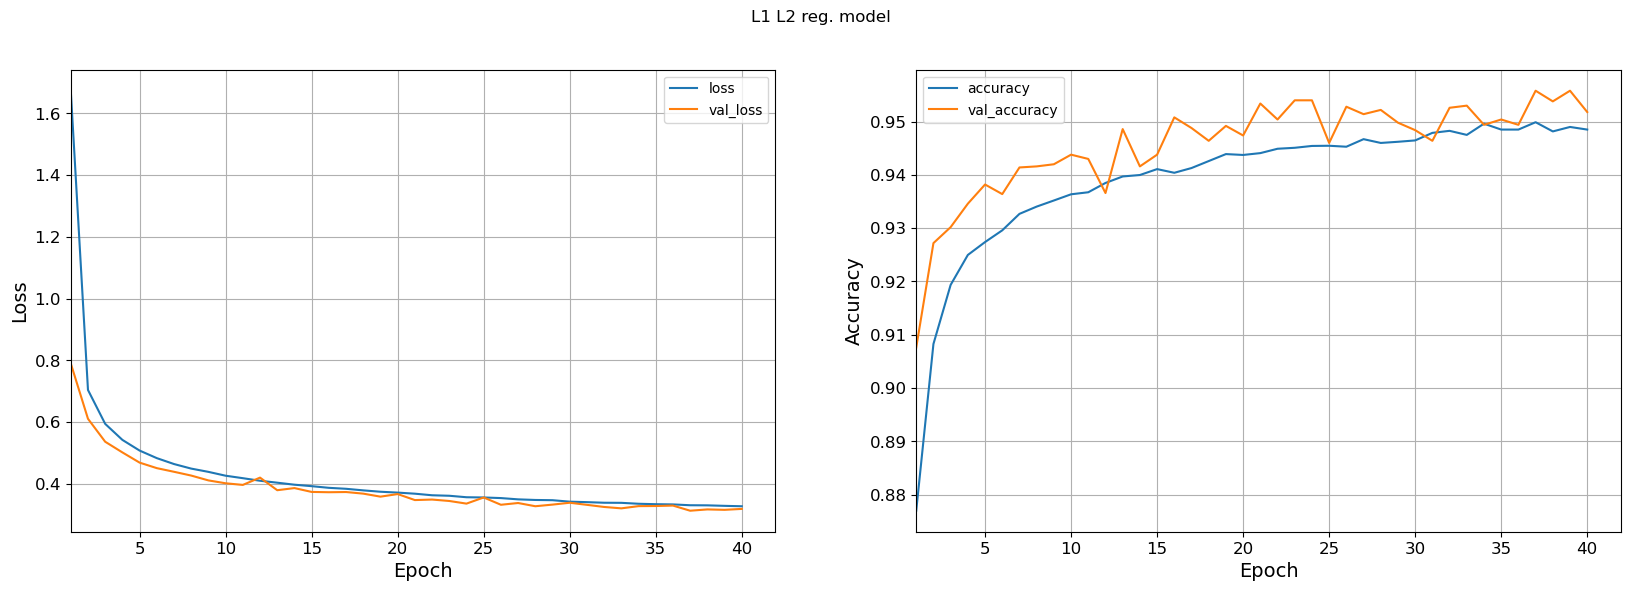

In [22]:
history_df_l1l2 = pd.DataFrame(history_1.history)
history_df_l1l2.index += 1

cols1 = ['loss', 'val_loss']
cols2 = ['accuracy', 'val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 6)

ax1.plot(history_df_l1l2[cols1])
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_xlim(left=1)
ax1.legend(cols1)

ax2.plot(history_df_l1l2[cols2])
ax2.grid(True)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(left=1)
ax2.legend(cols2)

fig.suptitle('L1 L2 reg. model')
plt.savefig("curves_normal.png", dpi=300)
plt.show()

In [23]:
# Load the model and evaluate it on the test set

model = keras.models.load_model("my_mnist_model_l1l2.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3169 - accuracy: 0.9519


[0.3169018030166626, 0.9519000053405762]

## Dropout

In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["accuracy"])

In [26]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, verbose=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model_dropout.h5", save_best_only=True)

history_1 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3827 - accuracy: 0.8831 - val_loss: 0.1346 - val_accuracy: 0.9602
Epoch 2/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1790 - accuracy: 0.9451 - val_loss: 0.0934 - val_accuracy: 0.9720
Epoch 3/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1364 - accuracy: 0.9580 - val_loss: 0.0844 - val_accuracy: 0.9730
Epoch 4/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9646 - val_loss: 0.0727 - val_accuracy: 0.9778
Epoch 5/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0961 - accuracy: 0.9701 - val_loss: 0.0680 - val_accuracy: 0.9796
Epoch 6/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9726 - val_loss: 0.0677 - val_accuracy: 0.9804
Epoch 7/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0794 - accuracy: 0.9738 - val_loss: 0.0699 - val_accuracy:

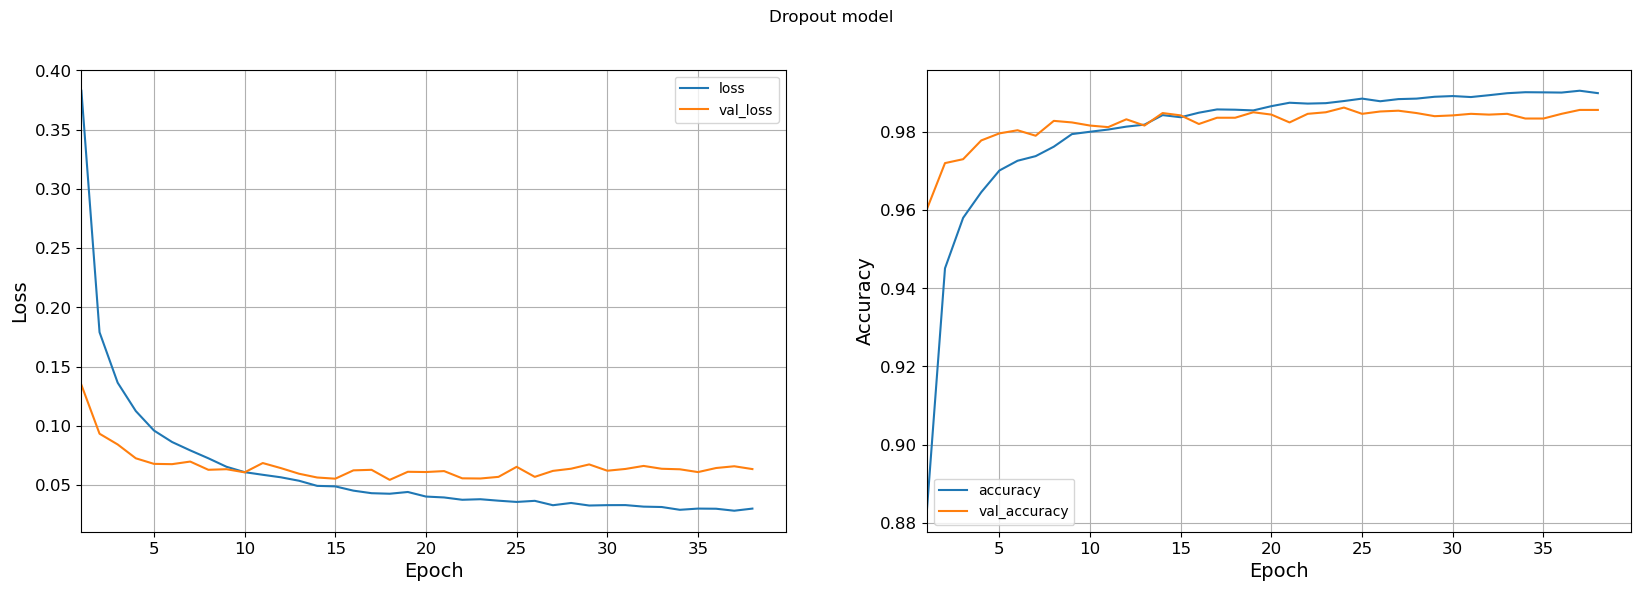

In [27]:
history_df_dropout = pd.DataFrame(history_1.history)
history_df_dropout.index += 1

cols1 = ['loss', 'val_loss']
cols2 = ['accuracy', 'val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 6)

ax1.plot(history_df_dropout[cols1])
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_xlim(left=1)
ax1.legend(cols1)

ax2.plot(history_df_dropout[cols2])
ax2.grid(True)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(left=1)
ax2.legend(cols2)

fig.suptitle('Dropout model')
plt.savefig("curves_normal.png", dpi=300)
plt.show()

In [28]:
# Load the model and evaluate it on the test set

model = keras.models.load_model("my_mnist_model_dropout.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 971us/step - loss: 0.0582 - accuracy: 0.9842


[0.05822038650512695, 0.9842000007629395]

## Alpha Dropout

In [29]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["accuracy"])

In [31]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, verbose=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model_alphadropout.h5", save_best_only=True)

history_1 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
1719/1719 [==============================] - 5s 2ms/step - loss: 1.6085 - accuracy: 0.4564 - val_loss: 0.5249 - val_accuracy: 0.8584
Epoch 2/40
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1061 - accuracy: 0.6271 - val_loss: 0.4434 - val_accuracy: 0.8812
Epoch 3/40
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0072 - accuracy: 0.6647 - val_loss: 0.4051 - val_accuracy: 0.8940
Epoch 4/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9380 - accuracy: 0.6861 - val_loss: 0.3542 - val_accuracy: 0.9056
Epoch 5/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9018 - accuracy: 0.6986 - val_loss: 0.3137 - val_accuracy: 0.9174
Epoch 6/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8647 - accuracy: 0.7119 - val_loss: 0.3119 - val_accuracy: 0.9190
Epoch 7/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8347 - accuracy: 0.7204 - val_loss: 0.2798 - val_accuracy:

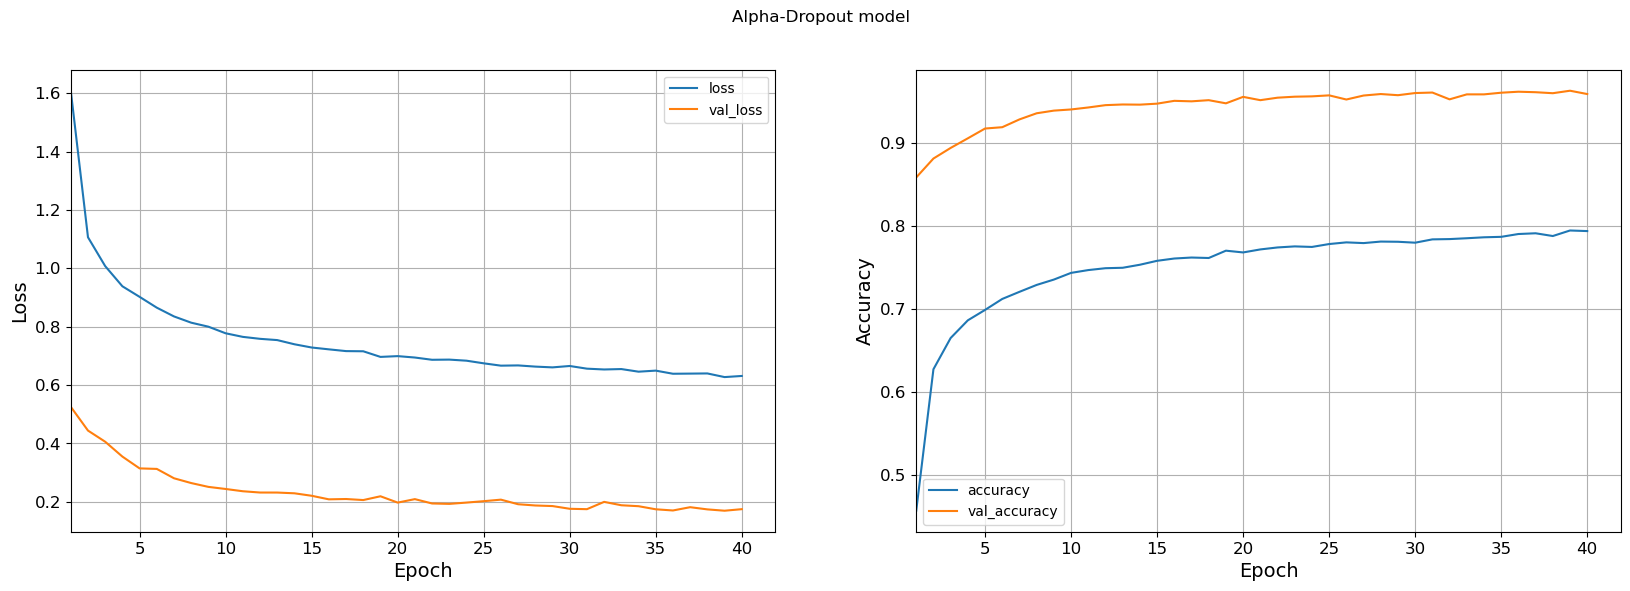

In [32]:
history_df_alphadropout = pd.DataFrame(history_1.history)
history_df_alphadropout.index += 1

cols1 = ['loss', 'val_loss']
cols2 = ['accuracy', 'val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 6)

ax1.plot(history_df_alphadropout[cols1])
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_xlim(left=1)
ax1.legend(cols1)

ax2.plot(history_df_alphadropout[cols2])
ax2.grid(True)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(left=1)
ax2.legend(cols2)

fig.suptitle('Alpha-Dropout model')
plt.savefig("curves_normal.png", dpi=300)
plt.show()

In [33]:
# Load the model and evaluate it on the test set

model = keras.models.load_model("my_mnist_model_alphadropout.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 965us/step - loss: 0.1750 - accuracy: 0.9576


[0.1749795377254486, 0.9575999975204468]

## Max norm

In [43]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu",
                       kernel_constraint=keras.constraints.max_norm(0.5)),
    keras.layers.Dense(100, activation="relu",
                       kernel_constraint=keras.constraints.max_norm(0.5)),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["accuracy"])

In [45]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, verbose=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model_maxnorm.h5", save_best_only=True)

history_1 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.9118 - val_loss: 0.1839 - val_accuracy: 0.9538
Epoch 2/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1703 - accuracy: 0.9510 - val_loss: 0.1455 - val_accuracy: 0.9570
Epoch 3/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1417 - accuracy: 0.9598 - val_loss: 0.1178 - val_accuracy: 0.9684
Epoch 4/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1254 - accuracy: 0.9643 - val_loss: 0.1187 - val_accuracy: 0.9656
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1138 - accuracy: 0.9663 - val_loss: 0.1121 - val_accuracy: 0.9712
Epoch 6/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1070 - accuracy: 0.9676 - val_loss: 0.0983 - val_accuracy: 0.9720
Epoch 7/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0992 - accuracy: 0.9703 - val_loss: 0.1140 - val_accuracy:

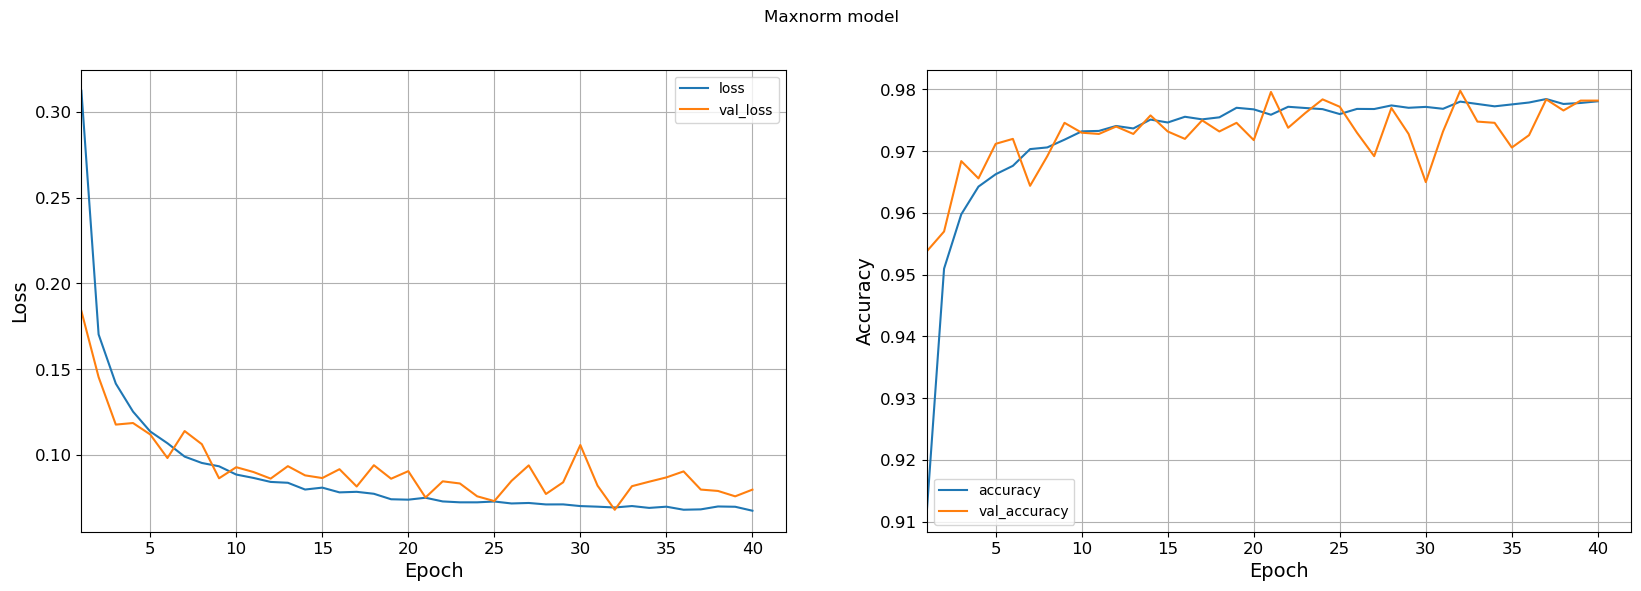

In [46]:
history_df_maxnorm = pd.DataFrame(history_1.history)
history_df_maxnorm.index += 1

cols1 = ['loss', 'val_loss']
cols2 = ['accuracy', 'val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 6)

ax1.plot(history_df_maxnorm[cols1])
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_xlim(left=1)
ax1.legend(cols1)

ax2.plot(history_df_maxnorm[cols2])
ax2.grid(True)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(left=1)
ax2.legend(cols2)

fig.suptitle('Maxnorm model')
plt.savefig("curves_normal.png", dpi=300)
plt.show()

In [47]:
# Load the model and evaluate it on the test set

model = keras.models.load_model("my_mnist_model_maxnorm.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9765


[0.07239489257335663, 0.9764999747276306]